In [9]:
#packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix)

In [20]:
# Importing dataset

df = pd.read_csv('Medical and Churn Data -1.csv').drop(columns=["Unnamed: 0"])

# Display the first few rows of the the data set
print(df.head())

         Price  SquareFootage  NumBathrooms  NumBedrooms  BackyardSpace  \
0  255614.8992         566.62      1.000000            4         779.42   
1  155586.0947        1472.34      1.000000            2         656.13   
2  131050.8324         550.00      1.779354            3         754.57   
3  151361.7125         941.81      2.035254            2         439.59   
4  113167.6128         550.00      1.064644            3         353.03   

   CrimeRate  SchoolRating  AgeOfHome  DistanceToCityCenter  EmploymentRate  \
0      20.56          5.62      39.46                 10.08           97.29   
1      15.62          5.63      40.51                  7.89           93.22   
2      12.47          9.20      48.38                 23.74           96.60   
3      22.22          7.08      94.67                  5.22           91.45   
4       8.28          5.93      16.80                 43.13           86.50   

   ...  RenovationQuality  LocalAmenities  TransportAccess  Fireplace  \
0

In [21]:
# Basic cleaning & handling missing data

target_col = "IsLuxury"

# Separate features and target
y = df[target_col]
X = df.drop(columns=[target_col])

# Handle missing categorical values by replacing with "unknown"
cat_cols = X.select_dtypes(include=["object"]).columns
X[cat_cols] = X[cat_cols].fillna("unknown")

# Handle missing numeric values by replacing with median
num_cols = X.select_dtypes(include=[np.number]).columns
for col in num_cols:
    median_val = X[col].median()
    X[col] = X[col].fillna(median_val)

print("\nAfter handling missing values:")
print(X.isna().sum())


After handling missing values:
Price                   0
SquareFootage           0
NumBathrooms            0
NumBedrooms             0
BackyardSpace           0
CrimeRate               0
SchoolRating            0
AgeOfHome               0
DistanceToCityCenter    0
EmploymentRate          0
PropertyTaxRate         0
RenovationQuality       0
LocalAmenities          0
TransportAccess         0
Fireplace               0
HouseColor              0
Garage                  0
Floors                  0
Windows                 0
PreviousSalePrice       0
dtype: int64


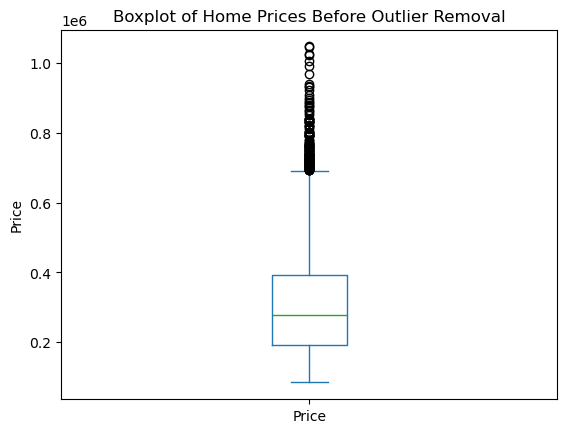


99th percentile price value: 750265.3848840005
Shape after removing outliers: (6930, 20)


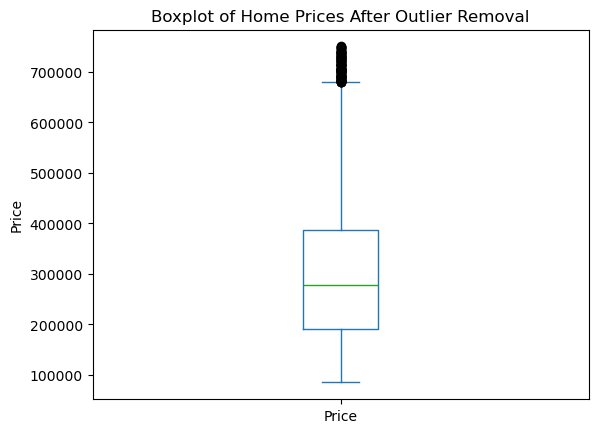

In [22]:
# 4. Outlier detection and removal 

price_col = "Price"  # change if your column name is different

if price_col in X.columns:
    # Plot a boxplot to visualize outliers
    plt.figure()
    X[price_col].plot.box()
    plt.title("Boxplot of Home Prices Before Outlier Removal")
    plt.ylabel("Price")
    plt.show()

    # Example rule: remove homes above the 99th percentile as extreme outliers
    upper_limit = X[price_col].quantile(0.99)
    print(f"\n99th percentile price value: {upper_limit}")

    # Keep only rows where price <= upper_limit
    mask = X[price_col] <= upper_limit
    X = X[mask]
    y = y[mask]

    print(f"Shape after removing outliers: {X.shape}")

    # Boxplot after removal
    plt.figure()
    X[price_col].plot.box()
    plt.title("Boxplot of Home Prices After Outlier Removal")
    plt.ylabel("Price")
    plt.show()
else:
    print(f"\nColumn '{price_col}' not found. Skipping outlier step.")

In [23]:
#  Encode categorical variables (one-hot encoding)

X_encoded = pd.get_dummies(X, drop_first=True)

print("\nShape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)


Shape before encoding: (6930, 20)
Shape after encoding: (6930, 23)


In [24]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (5544, 23)
Test set shape: (1386, 23)


In [25]:
# Train Random Forest Classifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

In [26]:
# Model evaluation

accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Classification Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest Classification Accuracy: 0.8932

Confusion Matrix:
[[620  73]
 [ 75 618]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       693
           1       0.89      0.89      0.89       693

    accuracy                           0.89      1386
   macro avg       0.89      0.89      0.89      1386
weighted avg       0.89      0.89      0.89      1386




Top 10 Most Important Features:
                 feature  importance
0                  Price    0.403539
16     PreviousSalePrice    0.151670
1          SquareFootage    0.049655
2           NumBathrooms    0.042521
11     RenovationQuality    0.042368
6           SchoolRating    0.030662
8   DistanceToCityCenter    0.029072
4          BackyardSpace    0.027586
13       TransportAccess    0.026828
5              CrimeRate    0.026092


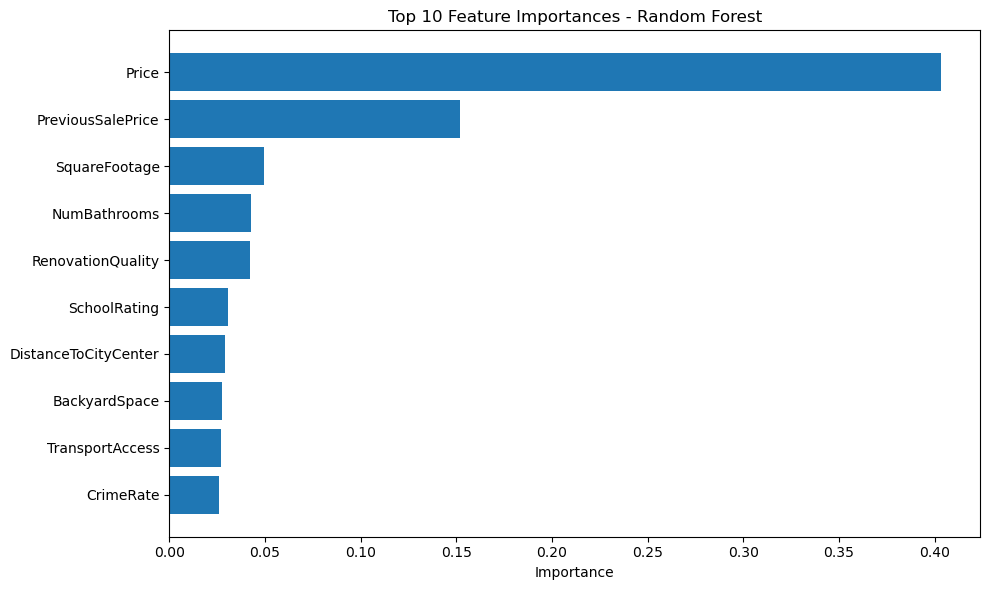

In [27]:
# Feature importance

importances = rf_model.feature_importances_
feature_names = X_encoded.columns

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print("\nTop 10 Most Important Features:")
print(feat_imp.head(10))

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
top_n = 10
plt.barh(
    feat_imp["feature"].head(top_n)[::-1],
    feat_imp["importance"].head(top_n)[::-1]
)
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()